# Módulo random   

***

## Generador de números aleatorios

Un **generador de números aleatorios** (**random number generator**) es un programa que genera una secuencia aleatoria, en principio, de forma impredecible.

Su uso es fundamental en aplicaciones de juegos de ordenador, plataformas de apuestas en línea, criptografía y en otras muchas aplicaciones de orden científico para simular o tomar decisiones de forma aleatoria.

En realidad, la mayor parte de los generadores de números aleatorios son, en realidad, **pseudoaleatorios**: a partir de un valor inicial, la **semilla** (**seed**), generan una secuencia $\{rnd1, rnd2, rnd3, ...\}$ que es **¡siempre la misma!**

### La semilla
Variando la semilla podemos hacer que la secuencia cambie de una ejecución a otra de nuestro programa. De hecho, los generadores aleatorios sofisticados permiten inicializar la semilla de forma cuidadosa porque, no en vano, debemos evitar que un posible **intruso** (**hacker**), analizando varios elementos de la secuencia, adivine la semilla inicial y sea capaz de reproducir, es decir, predecir, los siguientes valores generados. Esto sería inadmisible en una aplicación web de póquer o de cifrado de mensajes, por ejemplo.

Sin embargo, poder usar repetidamente la misma semilla es también una importante característica, ya que permite reproducir cuantas veces sea necesario el mismo experimento y, por ejemplo, depurar un posible error detectado.

### Generador de aleatorios en Python
Python usa por defecto el generador de pseudoaleatorios [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister), uno de los más utilizados en diferentes lenguajes de programación para aplicaciones científicas. Sin embargo, es totalmente inapropiado para una aplicación de tipo criptográfico. En general, dada la sofisticación de estos generadores, el análisis de los detalles de implementación de estos algoritmos requiere profundos conocimientos matemáticos. 

Si no se elige explícitamente una semilla, Python utilizará típicamente la hora del propio ordenador. En concreto, los milisegundos transcurridos desde la medianoche UTC del 1 de enero de 1970 hasta el momento *actual* en el que se ejecuta el código. Esta **marca temporal** (**epoch**) se conoce como **UNIX epoch**. Para muchas de las aplicaciones de interés científico, es una elección más que suficiente.

Empezar a usar [valores aleatorios en Python](https://docs.python.org/3/library/random.html) es muy simple, importando el módulo estándar `random`.

In [1]:
import random
print(random.random())

0.8546602804821801


Cada vez que ejecutamos el fragmento anterior, obtenemos diferentes valores. Son valores reales en el intervalo semiabierto $[0,1)$. Estadísticamente, la secuencia de estos valores conforman una **distribución uniforme**, es decir, tienen la misma probabilidad de ser generados.

Los valores son diferentes porque, cada vez que ejecutamos el fragmento, Python elige internamente una semilla diferente, al ser el tiempo transcurrido desde el **UNIX epoch** diferente. Sin embargo, si elegimos una semilla inicial, usando `random.seed(semilla)`, obtenemos siempre la misma secuencia. Veámoslo generando una lista de 10 valores aleatorios y ejecutando varias veces la celda.

In [4]:
import random

lista = []
semilla = 23  # Cambia este valor para comprobar que la lista cambia a su vez
random.seed(semilla)  # Comenta esta línea si quieres que la lista cambie cada vez que se ejecute la celda
for i in range(10):
    lista.append(random.random())
    
print(lista)

[0.9248652516259452, 0.9486057779931771, 0.8924333440485793, 0.08355067683068362, 0.5920272268857353, 0.4237474082349614, 0.5300880101180064, 0.13030294124748054, 0.1919971575392927, 0.444573573873013]


## Distribuciones uniformes
### Valores reales distribuidos uniformemente dentro de un rango
Si queremos obtener valores aleatorios de forma uniforme en un intervalo $[inf,sup]$ tenemos el método `uniform(inf, sup)`, que devuelve un real $x$ en el intervalo $inf \leq x \leq sup$.

In [6]:
lista = []
inf = -10.5
sup = 20.8
for i in range(10):
    lista.append(random.uniform(inf, sup))
    
print(lista)

[14.011103747823782, 7.939565010763754, 10.092667826126725, 8.937032545821495, 19.88401262322136, 0.8554058283647947, 13.28132096322252, 1.039803402244873, 7.405064251302743, 10.174655019534956]


El siguiente ejemplo muestra como generar una **nube** de puntos aleatorios en 2D. En concreto, $500$ puntos en el cuadrado formado por los vértices $\{-100,-100\}$ y $\{100,100\}$.

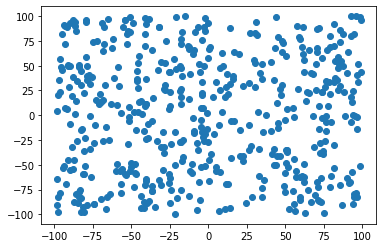

In [9]:
import matplotlib.pyplot as plt

inf = -100
sup = 100
num_puntos = 500
x = [0]*num_puntos
y = [0]*num_puntos
for i in range(num_puntos):
    x[i] = random.uniform(inf, sup)
    y[i] = random.uniform(inf, sup)
    
plt.scatter(x,y)

### Valores enteros distribuidos uniformemente dentro de un rango
Para generar valores enteros uniformemente distribuidos en un rango de valores puede usarse el método `randint(inf, sup)`, que devuelve un entero $x$ en el intervalo $inf \leq x \leq sup$.

In [10]:
inf = -10
sup = 6
lista = []
for i in range(10):
    lista.append(random.randint(inf, sup))
    
print(lista)

[-9, -4, -8, -3, -10, 1, -8, -2, -3, 3]


## Ejemplos de aplicación
### Adivinar un número entero *pensado* por el ordenador
Ayudándose del algoritmo de bisección, el usuario el que deberá calcular *a mano* (o con ayuda de otro programa en paralelo) la secuencia de valores que permitirá en el menor número promedio posible de intentos adivinar un número generado aleatoriamente por el ordenador.

El programa tendrá las siguientes características:
1. El usuario fijará un rango inicial de valores enteros.
2. El programa avisará del número de intentos disponibles.
3. Mediante un bucle solicitará al usuario la introducción del valor, indicando en el caso de que no se haya acertado si el valor a adivinar es inferior o superior. Si se acierta o se sobrepasa el número de intentos el bucle finalizará.
4. Mostrar un mensaje indicando si se ha acertado o no y el número de intentos empleado. 

Para la introducción del rango de valores se utiliza una función `introduce_rango_int(mensaje)`, que devolverá una tupla con los valores enteros `inf` y `sup` del rango. La cadena `mensaje` permite adaptar el uso de la función a otros cometidos diferentes a los de este ejemplo.

In [27]:
def introduce_rango_int(mensaje=''):
    '''
    Devuelve una tupla entera (inf, sup), garantizando inf <= sup.

    Parameters
    ----------
    mensaje: str
        Mensaje que se mostrará por pantalla para indicar el objeto de la solicitud de los valores del rango
    Returns
    -------
    inf, sup: tuple
        Tupla con los valores del rango
    Example
    -------
    >>>inf, sup = introduce_rango('Introduce un rango de valores:')
    '''
    
    print(mensaje)
    while True:
        try:
            inf = int(input('Valor inferior del rango:'))
            sup = int(input('Valor superior del rango:'))
            if inf > sup:
                raise ValueError('No se cumple {}<={}.'.format(inf, sup))
        except ValueError as error:
            print(error)
        else:
            break
    return inf, sup


inf, sup = introduce_rango_int()  # La función devuelve una tupla


Valor inferior del rango:1
Valor superior del rango:2


Para facilitar la introducción de valores por parte del usuario intentando adivinar el número *pensado* por el ordenador, utilizaremos la función `introduce_valor_int(inf, sup)`.

In [28]:
def introduce_valor_int(inf, sup):
    '''
    Devuelve un valor entero introducido por teclado por el usuario, tal que inf <= valor <= sup

    Parameters
    ----------
    inf: numérico, int
        Valor inferior del rango
    sup: numérico, int
        Valor superior del rango
    Returns
    -------
    valor: int
        Entero introducido por teclado por el usuario
    Example
    -------
    >>>valor = introduce_valor_int(0, 100)
    '''
    
    while True:
        print('Introduzca un valor entero dentro del rango de valores [{},{}]'.format(inf, sup))
        try:
            valor = int(input('Valor:'))
            if inf > valor or sup < valor:
                raise ValueError('El valor introducido no pertenece al rango [{},{}]'.format(inf, sup))
        except ValueError as error:
            print(error)
        else:
            break
    return valor


print(introduce_valor_int(0, 100))

Introduzca un valor entero dentro del rango de valores [0,100]
Valor:1
1


Finalmente, el bucle de solicitud de valores al usuario, puede encapsularse en una función `adivina_numero(inf, sup)`.

In [29]:
def adivina_numero(inf, sup):
    '''
    Devuelve una tupla con el resultado del proceso de adivinación

    Parameters
    ----------
    inf: numérico, int
        Valor inferior del rango
    sup: numérico, int
        Valor superior del rango
    Returns
    -------
    exito: bool
        True si se ha acertado el número
    i+1: int
        Número de intentos empleados
    num_intentos_max: int
        Número de intentos máximos permitidos, en consonancia con el algoritmo de bisección
    valor_a_adivinar: int
        Número pensad por el ordenador
    Example
    -------
    >>>exito, num_intentos, num_intentos_max, valor_a_adivinar = adivina_numero(0, 100)
    '''
    
    num_intentos_max = int(math.log2(sup-inf+1)+1)
    print('Te daré {} oportunidades para acertar.'.format(num_intentos_max))

    valor_a_adivinar = random.randint(inf,sup)

    exito = False
    for i in range(num_intentos_max):
        valor = introduce_valor_int(inf, sup)
        if valor < valor_a_adivinar:
            print('Debes probar con un valor superior.')
        elif valor > valor_a_adivinar:
            print('Debes probar con un valor inferior.')
        else:
            exito = True
            break
            
    return exito, i+1, num_intentos_max, valor_a_adivinar

El programa principal quedaría como sigue:

In [31]:
# Adivinar un número pensado por el ordenador. 
# El usuario elige el rango de valores al que pertenece el número que debe adivinar el programa.

import math
import random

inf, sup = introduce_rango_int('Introduzca el rango de valores enteros al que pertenece el número que debe adivinarse.') 
 
exito, num_intentos, num_intentos_max, valor_a_adivinar = adivina_numero(inf, sup)
if exito:
    print('Has acertado en {} intentos.'.format(num_intentos))
else:
    print('¡Torpe! Consumiste los {} intentos disponibles.'.format(num_intentos_max))
    print('El número que tenías que adivinar es el {}.'.format(valor_a_adivinar))

Introduzca el rango de valores enteros al que pertenece el número que debe adivinarse.
Valor inferior del rango:0
Valor superior del rango:100
Te daré 7 oportunidades para acertar.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:50
Debes probar con un valor inferior.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:25
Debes probar con un valor inferior.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:12
Debes probar con un valor superior.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:18
Debes probar con un valor superior.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:21
Debes probar con un valor superior.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:23
Has acertado en 6 intentos.


Un ejemplo de ejecución es el siguiente:
```
Introduzca el rango de valores enteros al que pertenece el número que debe adivinarse.
Valor inferior del rango:0
Valor superior del rango:100
Te daré 7 oportunidades para acertar.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:50
Debes probar con un valor inferior.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:25
Debes probar con un valor inferior.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:12
Debes probar con un valor superior.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:18
Debes probar con un valor superior.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:21
Debes probar con un valor superior.
Introduzca un valor entero dentro del rango de valores [0,100]
Valor:23
Has acertado en 6 intentos.
```

### Cálculo del número $\pi$

Para calcular $\pi$ vamos a usar un círculo centrado en el origen de radio $1$, inscrito en un cuadrado de lado $2$.
El área del cuadrado es $2*2=4$ y el del círculo $\pi r^2=\pi$.

Por tanto, la relación entre ambas áreas es:

$$\frac{\text{Área círculo}}{\text{Área cuadrado}}= \frac{\pi}{4}$$

Mediante **fuerza burta** podemos generar una secuencia de números aleatorios distribuidos uniformemente dentro del cuadrado. Si relacionamos los que han **caído cual dardos** dentro del círculo frente a los totales, deberemos obtener un valor que sigue la relación $\pi/4$.

En lugar de todo el cuadrado, podemos escoger sólo el primer cuadrante y utilizar directamente la función `random()`.

In [35]:
n = 10000  # Puedes probar con otros valores para ver como varía la precisión

contador = 0
for _ in range(n):
    x = random.random()
    y = random.random()
    
    if x*x + y*y < 1:
        contador += 1
        
print('La aproximación obtenida para pi con {} dardos es {}'.format(n, 4*contador/n))

La aproximación obtenida para pi con 10000 dardos es 3.1532


Nótese el uso del símbolo `_` como indicativo que el índice del bucle no es necesario y, por tanto, lo **ignoramos**.

Podemos dibujar el algoritmo usando la biblioteca Matplotlib. Para ello, debemos almacenar los valores obtenidos dentro y fuera del círculo en sendas parejas de listas.

La aproximación obtenida para pi con 10000 dardos es 3.1352


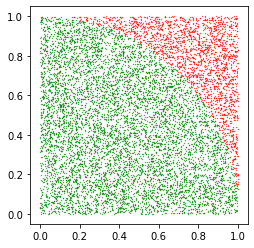

In [48]:
import matplotlib.pyplot as plt
n = 10000

contador = 0
x_dentro = []
y_dentro = []
x_fuera = []
y_fuera = []
for _ in range(n):
    x = random.random()
    y = random.random()
    
    if x*x + y*y < 1.:
        contador += 1
        x_dentro.append(x)
        y_dentro.append(y)
    else:
        x_fuera.append(x)
        y_fuera.append(y)
        
print('La aproximación obtenida para pi con {} dardos es {}'.format(n, 4*contador/n))

plt.scatter(x_fuera, y_fuera, color='red', s=0.1)
plt.scatter(x_dentro, y_dentro, color='green', s=0.1)
plt.axis('scaled')
plt.show()

Veremos más adelante cómo generar en una sóla sentencia una lista de aleatorios cuando estudiemos la biblioteca Numpy. 